In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [33]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [36]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [37]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

english_stopwords = set(stopwords.words('english'))
ps=PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [38]:

def preprocess_text(text):
  # 1. Convert to lowercase
  text = text.lower()
  # 2. Remove punctuation, special chars, numbers
  text = re.sub(r'[^a-z\s]', '', text)

  # 3. Tokenize
  tokens=word_tokenize(text)

  filtered_tokens = [word for word in tokens if word not in english_stopwords]  # Remove stopwords
  stemmed_tokens = [ps.stem(word) for word in filtered_tokens]  # Stemming
  # lemmatizer = WordNetLemmatizer()
  # lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  # print(lemmatized_tokens)
  return stemmed_tokens

In [39]:
df['email'] = df['v2'].apply(preprocess_text)

In [40]:
df.drop(['v2'],axis=1, inplace=True)


In [41]:
df.rename(columns={'v1': 'label'}, inplace=True)

In [42]:
df['email'] = df['email'].apply(lambda tokens: ' '.join(tokens))


In [43]:
df

,label,email
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...
5568,ham,b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth els ...


<ipython-input-44-0a919118aa2d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


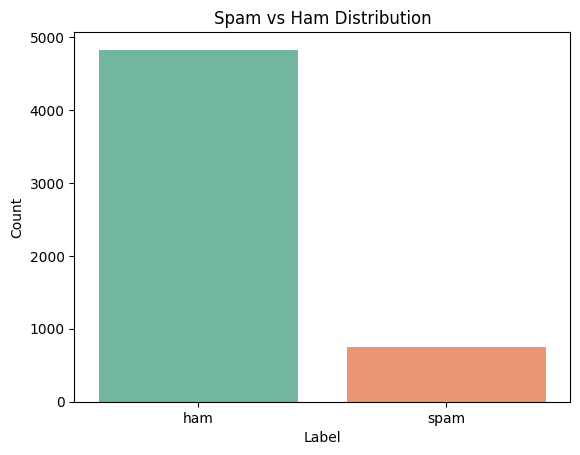

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='label', palette='Set2')
plt.title('Spam vs Ham Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize your preprocessed text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['email'])  # df['email'] is preprocessed
y = df['label']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


<ipython-input-46-c52278d124d4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_df, x='label', palette='Set3')


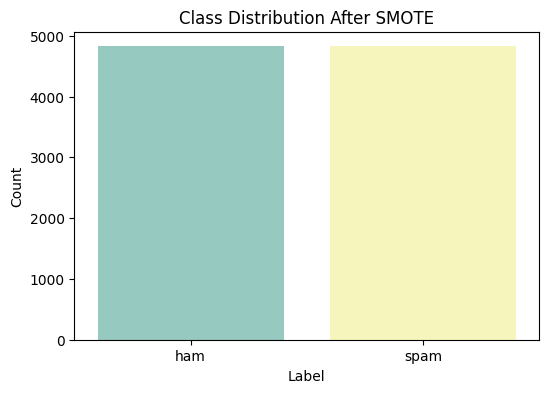

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert y_resampled (array) to a DataFrame
resampled_df = pd.DataFrame({'label': y_resampled})

plt.figure(figsize=(6, 4))
sns.countplot(data=resampled_df, x='label', palette='Set3')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train/test split on balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.983419689119171
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       985
        spam       0.98      0.99      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



In [52]:
def predict_spam(text):
    # Preprocess input text
    preprocessed = preprocess_text(text)  # tokenized and stemmed
    joined = ' '.join(preprocessed)       # join tokens for vectorizer

    # Vectorize
    vect_input = vectorizer.transform([joined])

    # Predict
    prediction = model.predict(vect_input)[0]
    probability = model.predict_proba(vect_input)[0].max()

    return prediction, probability


In [54]:
test_email = """
Last Days to get Free offers for Fluig AI Diagramming.
Fluig AI new release campaign ends on May 31st!!!
Turns your ideas, docs or code into clear diagrams, like mind maps, flowcharts, timelines, cards and more, with AI chats, all in just seconds!
Try it now and get 1 Month FREE of Fluig + Mockplus immediately!
Hurry! 4 days left only!
"""
label, prob = predict_spam(test_email)

print(f"Prediction: {label}")
print(f"Confidence: {prob:.2f}")


Prediction: spam
Confidence: 0.68
